# 0. IMPORT LIBRARIES

In [1]:
globals().clear
import time
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from datetime import datetime
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import tensorflow       as tf
import keras.optimizers as op
from tensorflow                     import keras
from tensorflow.keras.models        import Sequential
from tensorflow.keras.layers        import Dense
from tensorflow.keras.layers        import Dropout
from tensorflow.keras.optimizers    import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. LOAD AND FORMAT DATA

In [3]:
#Load Dataset
df = pd.read_csv('/Users/stevenwhang/Capstone/Datasets/df.csv')
DATETIME = df.DATETIME
df.shape

(10843, 75)

In [ ]:
# Load dataset
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/data/'
file = 'df.csv'
df = pd.read_csv(path+file)
DATETIME = df.DATETIME
df.shape

(10758, 75)

# 2. CREATE THE MODEL: Train 60 days and predict 1 day

In [4]:
import time
file_name = 'MLP.60d.1d'
step_rows  = 1*22     #22*20 #110 (1  day)
total_rows = 10758    #489*22     (24 months)
train_rows = 60*22 #420*22 #9240  (03 months)

scale_X = MinMaxScaler()
model = Sequential()
model.add(Dense(100, activation = 'relu', input_dim = df.iloc[:,1:-1].shape[1]))  # initiating with 100 neurons
model.add(Dropout(0.25))                                                          # adding dropout to avoid overfitting
model.add(Dense(1))                                                               # output layer

opt = Adam(amsgrad = True, lr = 0.001, beta_1 = 0.79, beta_2 = 0.999)             # using Adam optimizer, at a learning rate of 0.001
model.compile(loss = 'mse', optimizer = opt)                                      # compiling model

result = pd.DataFrame(columns = ['DATETIME', 'ACTUAL', 'PREDICTED', 'DIFFERENCE', 'TRAIN_DURATION'])

for i in range(0, total_rows - train_rows, step_rows):
  
  st = time.time()
  # 1. Obtain X and y
  train, test = df.iloc[i:train_rows+i, 1:], df.iloc[train_rows+i:train_rows+i+step_rows, 1:]
  X_train, y_train  = train.iloc[:,:-1], train.iloc[:,-1]
  X_test , y_test   = test.iloc[:,:-1] , test.iloc[:,-1]

  # 2. Scale X
  X_train = scale_X.fit_transform(X_train)
  X_test = scale_X.transform(X_test)
  
  # 3. Fit and Predict 
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test, verbose=False)
  et = time.time()
  # 4. Save data with prediction
  fecha = DATETIME.iloc[train_rows+i:train_rows+i+step_rows]
  datos = {'DATETIME': fecha.ravel(), 'ACTUAL': y_test.ravel(), 'PREDICTED': y_hat.ravel(), 'DIFFERENCE': abs(y_hat.ravel()-y_test.ravel()), 'TRAIN_DURATION': np.full(y_hat.ravel().shape[0], et-st)}
  data = pd.DataFrame(data = datos)
  result = result.append(data)

  print("Count Down: ",  math.trunc((total_rows-train_rows-i)/step_rows))
  #print(data.head())


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 0s 1ms/step - loss: 74411.1328
Count Down:  429
42/42 [==============================] - 0s 1ms/step - loss: 73159.6172
Count Down:  428
42/42 [==============================] - 0s 1ms/step - loss: 69737.5938
Count Down:  427
42/42 [==============================] - 0s 943us/step - loss: 63929.1992
Count Down:  426
42/42 [==============================] - 0s 1ms/step - loss: 55879.5156
Count Down:  425
42/42 [==============================] - 0s 990us/step - loss: 46500.1992
Count Down:  424
42/42 [==============================] - 0s 1ms/step - loss: 37111.9414
Count Down:  423
42/42 [==============================] - 0s 990us/step - loss: 27303.4297
Count Down:  422
42/42 [==============================] - 0s 898us/step - loss: 18785.5723
Count Down:  421
42/42 [==============================] - 0s 1ms/step - loss: 12156.8105
Count Down:  420
42/42 [==============================] - 0s 1ms/step - loss: 7684.6074
Count Down:  419
42/42 [=======

42/42 [==============================] - 0s 1ms/step - loss: 3409.9951
Count Down:  337
42/42 [==============================] - 0s 975us/step - loss: 3519.5984
Count Down:  336
42/42 [==============================] - 0s 965us/step - loss: 3414.2632
Count Down:  335
42/42 [==============================] - 0s 1ms/step - loss: 3015.1306
Count Down:  334
42/42 [==============================] - 0s 973us/step - loss: 2884.6104
Count Down:  333
42/42 [==============================] - 0s 972us/step - loss: 2753.3101
Count Down:  332
42/42 [==============================] - 0s 931us/step - loss: 2858.4629
Count Down:  331
42/42 [==============================] - 0s 882us/step - loss: 2710.7170
Count Down:  330
42/42 [==============================] - 0s 907us/step - loss: 2734.5706
Count Down:  329
42/42 [==============================] - 0s 933us/step - loss: 2583.9187
Count Down:  328
42/42 [==============================] - 0s 938us/step - loss: 2798.1531
Count Down:  327
42/42 [=======

42/42 [==============================] - 0s 1ms/step - loss: 2930.9827
Count Down:  245
42/42 [==============================] - 0s 1ms/step - loss: 2543.6589
Count Down:  244
42/42 [==============================] - 0s 1ms/step - loss: 2883.2297
Count Down:  243
42/42 [==============================] - 0s 2ms/step - loss: 2779.5842
Count Down:  242
42/42 [==============================] - 0s 1ms/step - loss: 3694.2935
Count Down:  241
42/42 [==============================] - 0s 1ms/step - loss: 4711.1577
Count Down:  240
42/42 [==============================] - 0s 1ms/step - loss: 5382.2979
Count Down:  239
42/42 [==============================] - 0s 1ms/step - loss: 5239.5879
Count Down:  238
42/42 [==============================] - 0s 1ms/step - loss: 5258.5376
Count Down:  237
42/42 [==============================] - 0s 1ms/step - loss: 4711.9756
Count Down:  236
42/42 [==============================] - 0s 1ms/step - loss: 4395.7778
Count Down:  235
42/42 [=========================

42/42 [==============================] - 0s 930us/step - loss: 3069.4431
Count Down:  154
42/42 [==============================] - 0s 919us/step - loss: 2953.5259
Count Down:  153
42/42 [==============================] - 0s 905us/step - loss: 2960.8889
Count Down:  152
42/42 [==============================] - 0s 987us/step - loss: 2862.8733
Count Down:  151
42/42 [==============================] - 0s 975us/step - loss: 2790.9216
Count Down:  150
42/42 [==============================] - 0s 871us/step - loss: 2833.2949
Count Down:  149
42/42 [==============================] - 0s 870us/step - loss: 2980.8916
Count Down:  148
42/42 [==============================] - 0s 863us/step - loss: 3004.3767
Count Down:  147
42/42 [==============================] - 0s 874us/step - loss: 3134.3037
Count Down:  146
42/42 [==============================] - 0s 1ms/step - loss: 2903.5696
Count Down:  145
42/42 [==============================] - 0s 873us/step - loss: 3206.9031
Count Down:  144
42/42 [=====

42/42 [==============================] - 0s 903us/step - loss: 6052.4834
Count Down:  63
42/42 [==============================] - 0s 963us/step - loss: 5709.8218
Count Down:  62
42/42 [==============================] - 0s 890us/step - loss: 5832.3604
Count Down:  61
42/42 [==============================] - 0s 964us/step - loss: 5856.7349
Count Down:  60
42/42 [==============================] - 0s 917us/step - loss: 5916.3228
Count Down:  59
42/42 [==============================] - 0s 970us/step - loss: 5610.2124
Count Down:  58
42/42 [==============================] - 0s 866us/step - loss: 5801.6743
Count Down:  57
42/42 [==============================] - 0s 964us/step - loss: 5503.9458
Count Down:  56
42/42 [==============================] - 0s 1ms/step - loss: 5397.4824
Count Down:  55
42/42 [==============================] - 0s 928us/step - loss: 5516.1655
Count Down:  54
42/42 [==============================] - 0s 859us/step - loss: 5678.4570
Count Down:  53
42/42 [================

# 3. CREATE DATASET FOR METRICS AND GRAPH

In [5]:
result = result.reset_index(drop=True)
result.dropna(inplace = True)
result['DATETIME'] = pd.to_datetime(result['DATETIME'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
result['DATE']     = result.DATETIME.dt.date

# 4. CREATE THE GRAPH

<ipython-input-6-0eec91373a51>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())


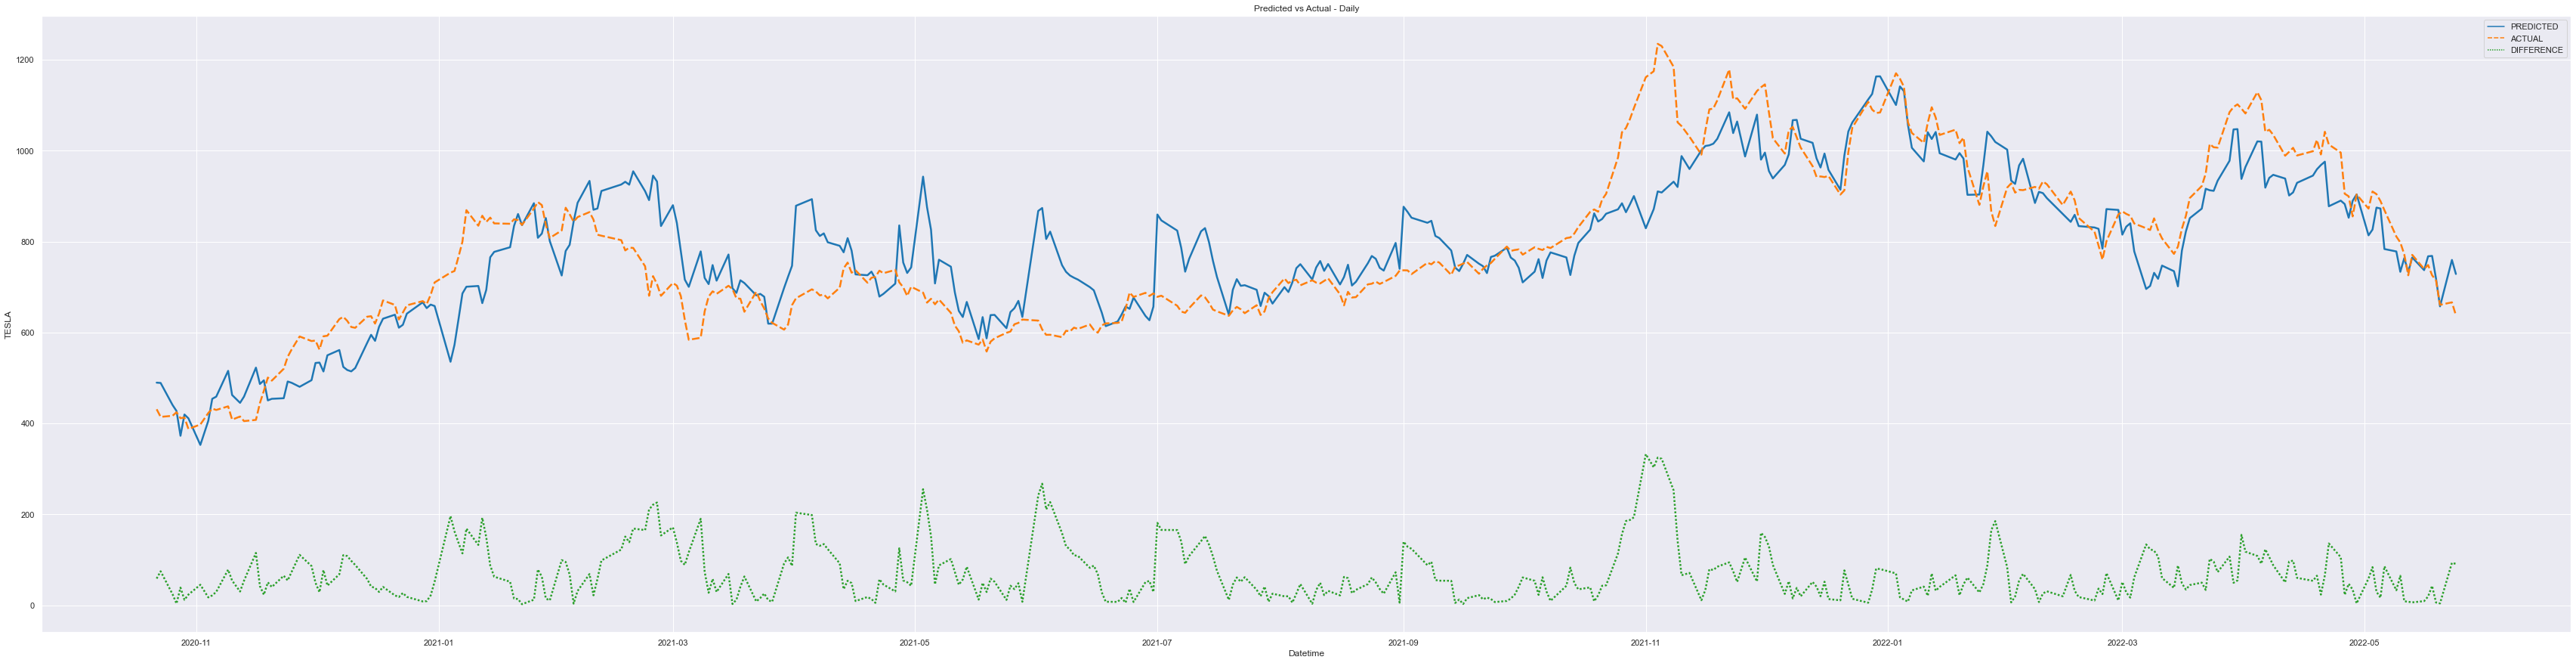

In [6]:
graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())
graph = graph.iloc[40:,:]
plt.figure(figsize=(60,15))
linep = sns.lineplot(data = graph, palette="tab10", linewidth=2.5)
linep.set(xlabel='Datetime', ylabel='TESLA', title='Predicted vs Actual - Daily')
plt.show()

# 5. CALCULATE METRICS

In [7]:
#Check the overall RMSE value
rmse = np.sqrt(mean_squared_error(result['ACTUAL'], result['PREDICTED']))
rmse

102.12072562697463

In [8]:
#Check the overall MAPE value
mape = mean_absolute_percentage_error(result['ACTUAL'], result['PREDICTED'])
mape 

0.10866607664391334

In [9]:
#Check the mean difference
average = result.DIFFERENCE.mean()
average

73.67243162874306

In [10]:
#Check the Mean Train Time
time = result.TRAIN_DURATION.mean()
time # Seconds

0.14041298697322677

In [11]:
metrics = {'RMSE': [rmse], 'MAPE': [mape], 'MAE': [average], 'MTT': [time]}
metrics = pd.DataFrame(data = metrics, index = ['MLP'])
metrics

,RMSE,MAPE,MAE,MTT
MLP,102.120726,0.108666,73.672432,0.140413


In [ ]:
#Writting files
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/output/'
graph.to_csv(path+file_name+'-GRAPH.csv', index=True)
result.to_csv(path+file_name+'-RESULT.csv', index=True)
metrics.to_csv(path+file_name+'-METRICS.csv', index=True)